# **TITANIC DATASET: EXPLORATORY DATA ANALYSIS**

This is the classic dataset that everyone uses for a (first) simple approach to Machine Learning.

.

.


## **Import libraries and data**

In [1]:
#Importing libraries
import random
import pycaret
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.stats import skew

In [2]:
#Importing the data
Data = pd.read_csv("all_titanic_data.csv")
Data.head()

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home_det
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


.

The Titanic dataset contains information about the passengers (e.g., age, sex, class on the ship,...).

In [3]:
#Data information
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Survived  1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   Sibsp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
 11  Boat      486 non-null    object 
 12  Body      121 non-null    float64
 13  Home_det  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


.

There are several missing values (in columns "Age", "Fare", "Cabin","Embarked","boat","Body","Home_det").

.

.

The features inside the dataset are the following:
1. *Pclass*: it is the class of the passenger (integer -- 1: first class, 2: second class, 3: third class)
2. *Survived*: it is the column containing the label 1 (survived) and 0 (dead)
3. *Name*: name of the passenger (string)
4. *Sex*: sex of the passenger (string -- male, female)
5. *Age*: age of the passenger (float)
6. *Sibsp*: number of siblings/spouses aboard (integer)
7. *Parch*: number of parents/children aboard (integer)
8. *Ticket*: number of the ticket (string)
9. *Fare*: passenger fare (float)
10. *Cabin*: cabin(s) of the passenger (float)
11. *Embarked*: port of embarkation (string -- C: Cherbourg, Q: Queenstown, S: Southampton)
12. *Boat*: number of the lifeboat (integer)
13. *Body*: number of the corpse in order of finding
14. *Home_det*: home and destination of the passenger


Let's start the analysis of the dataset.

.

.

## **Data Analysis and exploration**

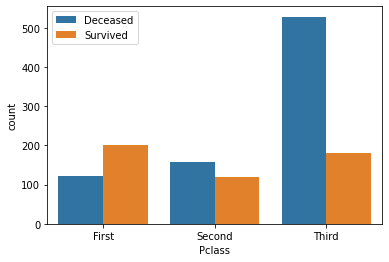

In [4]:
#Pclass
sn.countplot(x=Data.Pclass, hue=Data.Survived)
plt.xticks([0, 1, 2], ['First', 'Second', 'Third'])
plt.legend(["Deceased","Survived"])

.

It seems that the lower the class, the larger the percentage of people who did not survived. Of course, this can be related to the fact that most of the passengers were in the third class.

In [5]:
#Count
pd.DataFrame(Data.groupby("Survived").Pclass.value_counts())

Pclass
Survived Pclass        
0        3          528
         2          158
         1          123
1        1          200
         3          181
         2          119

.

The percentage of third class people who did not survive (label 0) is ~40% (almost half of the total number of people on board).

Moreover, the number of third class people who did not survive is ~2.9 times larger than the number of people who survived (compared to ~0.6 for first class, and ~1.3 for second class).

Number of male passengers:  843
Number of female passengers:  466


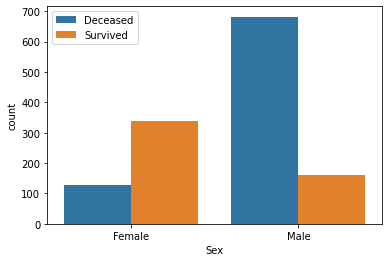

In [6]:
#Sex
print("Number of male passengers: ", (Data.Sex=="male").sum())
print("Number of female passengers: ", (Data.Sex=="female").sum())

sn.countplot(x=Data.Sex, hue=Data.Survived)
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(["Deceased","Survived"])

.

The majority of survivors were females (the first to leave the ship were women and children.)

In [7]:
#Name
#Separate the first part of the name from the rest (there is a comma between the two parts)
Names = Data.Name.str.split(",", expand=True)

#Separate the title from the rest (there is a dot between the two parts)
Names= Names.iloc[:,1].str.split(".", expand=True)

#Get the titles
Titles = Names.iloc[:,0]

#Unique values
Titles.unique()

array([' Miss', ' Master', ' Mr', ' Mrs', ' Col', ' Mme', ' Dr', ' Major',
       ' Capt', ' Lady', ' Sir', ' Mlle', ' Dona', ' Jonkheer',
       ' the Countess', ' Don', ' Rev', ' Ms'], dtype=object)

.

There are several titles that may be connected to the chance of survival.

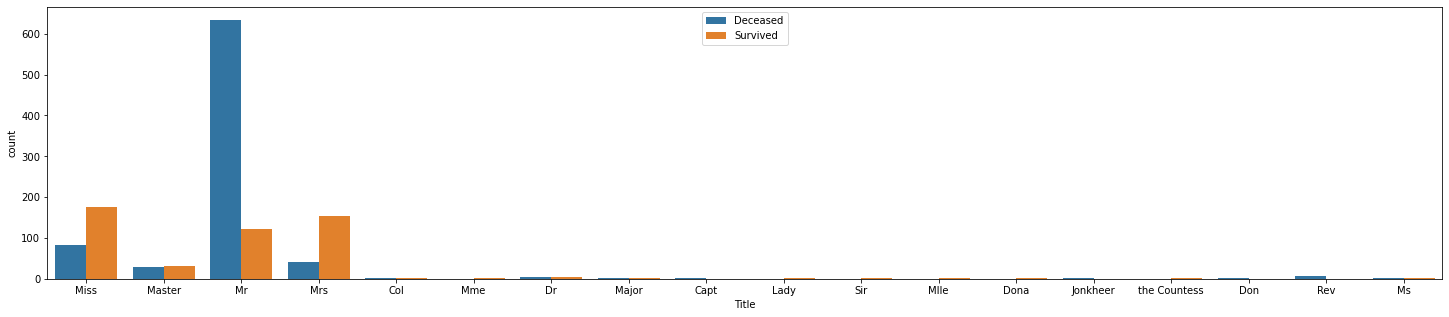

In [8]:
Data["Title"] = Data.Name.map(lambda p: p.split(", ")[1].split(".")[0])

plt.figure(figsize=(25,5))
sn.countplot(x=Data.Title, hue=Data.Survived)
plt.legend(["Deceased","Survived"],loc="upper center")

.

The majority of survivors were females (Miss, Mrs, Lady, Mlle, Countess).

Half of the people with the title "Master" survived. Only ~1/6 of "Mr"s survived.

All the other did not survive.

Age mean value:  29.881137667304014
Age median value:  28.0


([<matplotlib.axis.XTick at 0x7f54f2c03e48>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

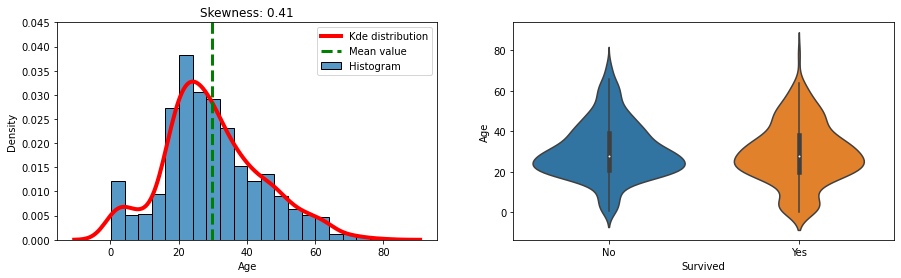

In [9]:
#Age
print("Age mean value: ", Data.Age.mean())
print("Age median value: ", Data.Age.median())

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
ax = sn.histplot(data=Data, x="Age", stat="density", bins=20, label="Histogram")
sn.kdeplot(data=Data, x="Age", color='red', lw=4, ax=ax, label="Kde distribution")
plt.plot([Data.Age.mean(),Data.Age.mean()],[0,0.06], '--g', lw=3, label="Mean value")
plt.ylim([0,0.045])
plt.title("Skewness: {:.2f}".format(skew(Data.Age, nan_policy ="omit")))
plt.legend()

plt.subplot(1,2,2)
sn.violinplot(x=Data.Survived,y=Data.Age)
plt.xticks([0,1],["No","Yes"])

.

The distributions of survived and non-survived people are similar.

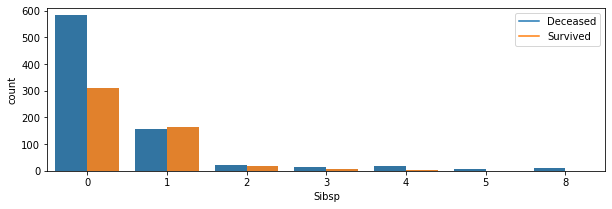

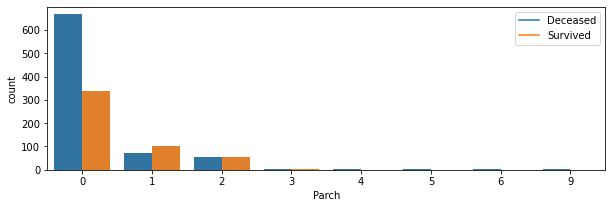

In [10]:
#Sibsp & Parch   
plt.figure(figsize=(10,3))

plt.plot(1,2,1)
sn.countplot(x=Data.Sibsp, hue=Data.Survived)
plt.legend(["Deceased","Survived"],loc="upper right")

plt.figure(figsize=(10,3))
plt.plot(1,2,2)
sn.countplot(x=Data.Parch, hue=Data.Survived)
plt.legend(["Deceased","Survived"],loc="upper right")

.

It seems that, alone passengers have a larger chance to survive.

In [11]:
#Column Sibsp+Parch
Data["Tot_people"] = Data.Sibsp+Data.Parch

#Count
pd.DataFrame(Data.groupby("Survived").Tot_people.value_counts())

Tot_people
Survived Tot_people            
0        0                  551
         1                  109
         2                   69
         5                   20
         4                   16
         3                   13
         6                   12
         10                  11
         7                    8
1        0                  239
         1                  126
         2                   90
         3                   30
         4                    6
         5                    5
         6                    4

.

In the end, looking at the two dataframes, passengers with 7 or more people along did not survive.

The survival chances seem to decrease with the number of people along.

In [12]:
#Ticket
print("Number of missing data: ", (Data.Ticket.isna()).sum())
print("Number of passengers: ", len(Data))
print("Number of unique tickets: ", len(Data.Ticket.unique()))

Number of missing data:  0
Number of passengers:  1309
Number of unique tickets:  929


.

Many people had the same ticket (same room on the ship).

Text(0.5, 6.79999999999999, 'People with same ticket')

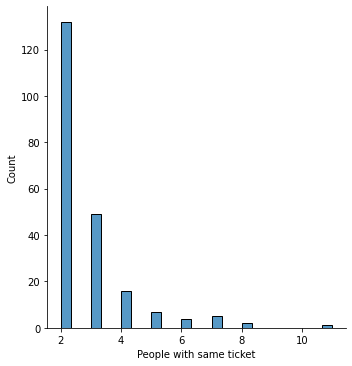

In [38]:
#People with the same ticket
Res = []
for i in Data.Ticket.unique() :
    if len(np.where(Data.Ticket == i)[0])>1 :
        Res.append(len(np.where(Data.Ticket == i)[0]))
        
sn.displot(Res)
plt.xlabel("People with same ticket")

.

For the majority of people, couples (having the same ticket) were more frequent.

Mean Fare price:  33.29547928134557
Median Fare price:  14.4542


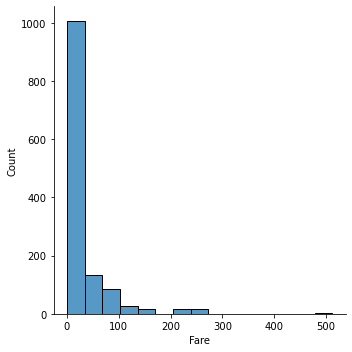

In [14]:
#Fare
print("Mean Fare price: ", Data.Fare.mean())
print("Median Fare price: ", Data.Fare.median())

sn.displot(Data.Fare,bins=15)

In [15]:
#Mean and standard deviation of survived passengers
pd.DataFrame(Data.groupby("Survived").Fare.agg(["mean","std"]))

,mean,std
Survived,,
0,23.353831,34.145096
1,49.361184,68.648795


.

There is a small difference: on average, it seems that passengers who paid a larger ricket fare had a larger chance to survive (probably because those people were in the first class).

However, the large standard deviations cannot allow to draw a definite conclusion.

In [16]:
#Cabin
print("Number of missing values: ", (Data.Cabin.isna()).sum())

#Missing values will be replaced with the letter "n"
Data.Cabin.fillna("n", inplace=True)

#The first letter of "Cabin" represents the corresponding deck (F is the deepest in the ship).
#We can extract the first letter of the cabin (i.e. the ship deck)
Data.Cabin = Data.Cabin.map(lambda p: str(p)[0])

#Unique values and count
Data.Cabin.value_counts()

Number of missing values:  1014


n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [17]:
#Count of survived passengers
pd.DataFrame(Data.groupby("Survived").Cabin.value_counts())

Cabin
Survived Cabin       
0        n        707
         C         37
         B         18
         D         14
         A         11
         E         11
         F          8
         G          2
         T          1
1        n        307
         C         57
         B         47
         D         32
         E         30
         F         13
         A         11
         G          3

In [18]:
#Percentage of survived passengers
for i in Data.Cabin.unique() :
    print(i, ": ", ((Data.Cabin==i) & (Data.Survived==1)).sum()/((Data.Cabin==i).sum()))

B :  0.7230769230769231
C :  0.6063829787234043
E :  0.7317073170731707
D :  0.6956521739130435
A :  0.5
n :  0.3027613412228797
T :  0.0
F :  0.6190476190476191
G :  0.6


.

There is no evidence that people who were in the upper decks had a larger chance to survive with respect to people in the lower decks.

This may be due to the large number of missing data.

([<matplotlib.axis.XTick at 0x7f54f27074a8>,
 [Text(0, 0, 'Southampton'),
  Text(1, 0, 'Cherbourg'),
  Text(2, 0, 'Queenstown')])

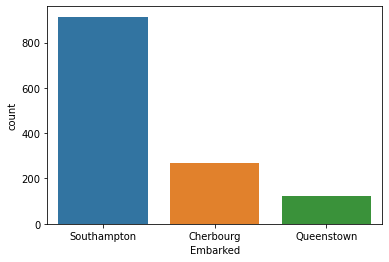

In [19]:
#Embarked  
sn.countplot(x=Data.Embarked)
plt.xticks([0,1,2],["Southampton","Cherbourg","Queenstown"])

.

The majority of people embarked in Southampton.

In [20]:
#Home_det: unique values
Data.Home_det.unique()

array(['St Louis, MO', 'Montreal, PQ / Chesterville, ON', 'New York, NY',
       'Hudson, NY', 'Belfast, NI', 'Bayside, Queens, NY',
       'Montevideo, Uruguay', 'Paris, France', nan, 'Hessle, Yorks',
       'Montreal, PQ', 'Winnipeg, MN', 'San Francisco, CA',
       'Dowagiac, MI', 'Stockholm, Sweden / Washington, DC',
       'Trenton, NJ', 'Glen Ridge, NJ', 'Youngstown, OH',
       'Birkdale, England Cleveland, Ohio', 'London / Winnipeg, MB',
       'Cooperstown, NY', 'St Leonards-on-Sea, England Ohio',
       'Los Angeles, CA', 'Pomeroy, WA', 'Omaha, NE', 'Philadelphia, PA',
       'Denver, CO', 'Belmont, MA', 'Washington, DC',
       'Austria-Hungary / Germantown, Philadelphia, PA',
       'Germantown, Philadelphia, PA', 'Bryn Mawr, PA',
       'Ascot, Berkshire / Rochester, NY', 'Little Onn Hall, Staffs',
       'Amenia, ND', 'New York, NY / Ithaca, NY', 'London, England',
       'Liverpool, England / Belfast', 'Stoughton, MA', 'Victoria, BC',
       'Lakewood, NJ', 'Roachdale, I

.

For the majority of the passengers, the first part is the name of the home town/state. The second part is the destination town/state.
For some people, only one part is present: it occurs when home and destination are the same (e.g., 'New York, NY')
or when only the destination is unknown (e.g., 'London, England')

Let's find only the destination (if present).

In [21]:
#Make a copy
Home_Det = pd.DataFrame(Data.Home_det.copy())

#Replace NaN with '0'
Home_Det.fillna("0",inplace=True)

#Create new column
Home_Det["Destination"] = 0

#Split data
i=0
while i<len(Home_Det) :
    if Home_Det.iloc[i][0]!="0" :
        a = Home_Det.iloc[i][0].split(", ")[-1]
        if len(a)<3 :
            Home_Det.iloc[i] = a
    i=i+1

#Unique values
Home_Det.Destination.unique()

array(['MO', 'ON', 'NY', 'NI', 0, 'PQ', 'MN', 'CA', 'MI', 'DC', 'NJ',
       'OH', 'MB', 'WA', 'NE', 'PA', 'CO', 'MA', 'ND', 'BC', 'IN', 'WI',
       'AB', 'IA', 'CT', 'IL', 'VT', 'OR', 'RI', 'WV', 'ME', 'NS', 'FL',
       'NM', 'ID', 'UT', 'SD', 'SK', 'KY', 'MT', 'NH', 'DE', 'VA', 'KS',
       'AZ'], dtype=object)

In [22]:
#Count
Home_Det.Destination.value_counts()

0     750
NY    166
NJ     36
MA     34
MI     33
PA     32
IL     30
OH     24
PQ     21
ON     20
MN     19
MB     15
CA     13
CT     12
WI      9
DC      8
OR      7
IA      7
WA      7
RI      6
MO      4
BC      4
ND      4
MT      4
KS      4
VT      4
ME      3
CO      3
IN      3
ID      3
VA      3
SD      3
KY      2
AB      2
FL      2
NS      2
WV      2
NM      1
UT      1
SK      1
NH      1
DE      1
NE      1
NI      1
AZ      1
Name: Destination, dtype: int64

.

Despite the large number of missing values, for the majority of people, the destination is NewYork.

In [23]:
#Boat (this is something related only to survived people)
print("Number of people on the lifeboats: ", Data.Boat.notnull().sum())

#Unique values
Data.Boat.unique()

Number of people on the lifeboats:  486


array(['2', '11', nan, '3', '10', 'D', '4', '9', '6', 'B', '8', 'A', '5',
       '7', 'C', '14', '5 9', '13', '1', '15', '5 7', '8 10', '12', '16',
       '13 15 B', 'C D', '15 16', '13 15'], dtype=object)

<AxesSubplot:xlabel='Boat', ylabel='count'>

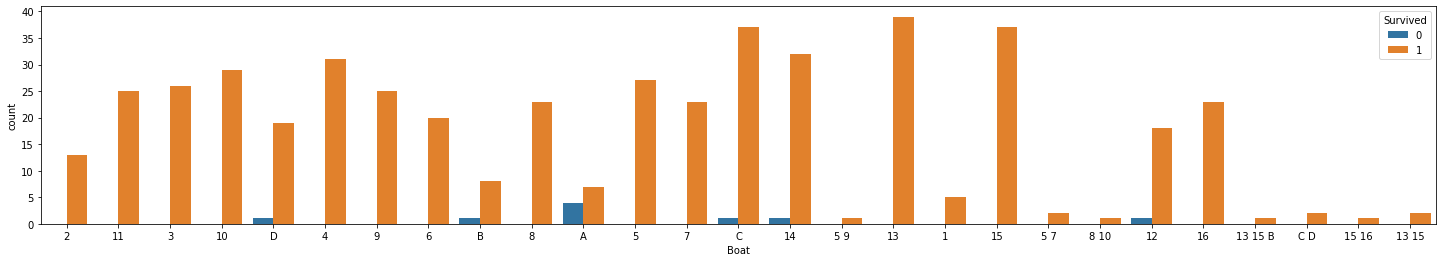

In [24]:
#Survived passengers
plt.figure(figsize=(25,4))
sn.countplot(x=Data.Boat,hue=Data.Survived)

.

From the plot above, it seems that some people, even in the lifeboat, did not survive.

In [25]:
print("Number of people who died on the lifeboats: ", (Data.Boat.notnull() & (Data.Survived==0) ).sum())
print("Mean number of people per lifeboat: ", Data.Boat[Data.Boat.notnull()].value_counts().mean())

Number of people who died on the lifeboats:  9
Mean number of people per lifeboat:  18.0


.

Even if the number of people per lifeboat is not the real one (because that the dataset of this notebook is not complete), it seems that not all lifeboat were completly full (they were tested for 60-70 men).

In [26]:
#Body (only non-survived passengers)
print("Number of retrieved bodies: ", Data.Body.notnull().sum())

Number of retrieved bodies:  121


.

.

## **Feature correlation**

<AxesSubplot:xlabel='Age', ylabel='Density'>

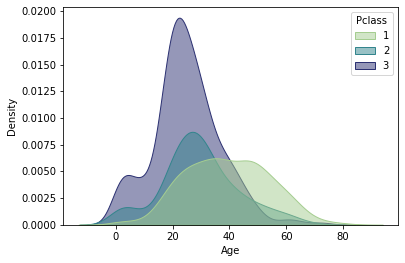

In [27]:
#Pclass & Age
sn.kdeplot(x=Data.Age,hue=Data.Pclass, fill=True,palette="crest",alpha=0.5)

.

On average, second and third classes were the "youngest" classes onboard, while the first class hosted older people.

For the third and second classes, there is a small bump for ages <10 meaning that there were a relevant number of children.

([<matplotlib.axis.XTick at 0x7f54f24ec8d0>,
 [Text(0, 0, 'First'), Text(1, 0, 'Second'), Text(2, 0, 'Third')])

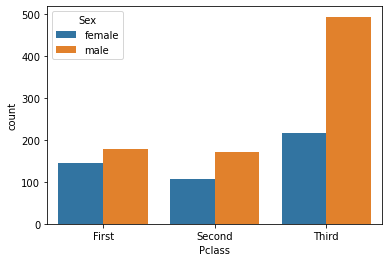

In [28]:
#Pclass & Sex
sn.countplot(x=Data.Pclass, hue=Data.Sex)
plt.xticks([0, 1, 2], ['First', 'Second', 'Third'])

.

The two groups are more balanced in the first two classes (married couples) while 2/3 of the the third class were men (alone passengers).

(0.0, 400.0)

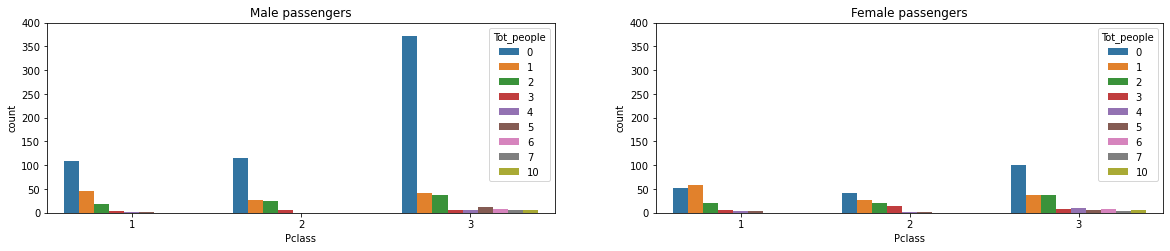

In [29]:
#Total number of people along with each passenger
Data["Tot_people"]=Data.Sibsp+Data.Parch

#Plot
plt.figure(figsize=(20,3.5))
plt.subplot(1,2,1)
sn.countplot(x=Data.Pclass[Data.Sex=="male"], hue=Data.Tot_people)
plt.title("Male passengers")
plt.ylim([0,400])
plt.subplot(1,2,2)
sn.countplot(x=Data.Pclass[Data.Sex=="female"], hue=Data.Tot_people)
plt.title("Female passengers")
plt.ylim([0,400])

.

As expected, from the two plots above, the number of alone passengers were almost men (the lone female passengers were ~50% less than men).

In [30]:
#Count
print("Alone male passengers")
print(Data.Pclass[(Data.Tot_people==0) & (Data.Sex=="male")].value_counts())
print("\nAlone female passengers")
print(Data.Pclass[(Data.Tot_people==0) & (Data.Sex=="female")].value_counts())

Alone male passengers
3    372
2    116
1    108
Name: Pclass, dtype: int64

Alone female passengers
3    100
1     52
2     42
Name: Pclass, dtype: int64


In [31]:
#Children (age<10)
Data[Data.Age<=10].groupby(["Sex"]).Pclass.value_counts()

Sex     Pclass
female  3         29
        2         11
        1          1
male    3         31
        2         11
        1          3
Name: Pclass, dtype: int64

.

As also noticed before, the majority of children (with age <10) were in the second and third classes.

In [32]:
#Majority of people on lifeboats
print(Data[Data.Boat.notnull()].Pclass.value_counts())
print("\n")
print(Data[Data.Boat.notnull()].groupby("Sex").Pclass.value_counts())

1    201
3    173
2    112
Name: Pclass, dtype: int64


Sex     Pclass
female  1         138
        3          95
        2          86
male    3          78
        1          63
        2          26
Name: Pclass, dtype: int64


.

The majority of people on the lifeboats were from the first class even though the majority of men were from the third class.

(0.5, 7.5)

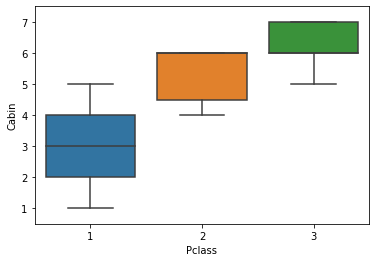

In [33]:
#Cabins and Class
Cabins = Data.Cabin.replace(np.sort(Data.Cabin[Data.Cabin!="n"].unique()),[1,2,3,4,5,6,7,8])
sn.boxplot(y=Cabins[Cabins!="n"],x=Data.Pclass)
plt.ylim([0.5,7.5])

.

The third class was the deepst class on the ship (decks: E-F-G).

It is possible to use this information to understand if the the deck location is correlated with the survival.

From the plot above, we have these combinations:
- Pclass1 --> Cabins 2-6                
- Pclass2 --> Cabins 5-7
- Pcalss3 --> Cabins 6-8

We can substitute missing values by choosing randomly a cabin depending on the Pclass. 
The random choice is to avoid to overfill the same cabin if, for example, the median value is used for imputation.

In [34]:
#Random decks selection based on the class
Data_cab = Data.copy()
for i in (np.where(Data_cab.Cabin=="n")[0]) :
    if (Data_cab.Pclass.iloc[i] == 1):
        Data_cab.loc[i,"Cabin"] = random.choice(["B","C","D","E"])     
    elif (Data_cab.Pclass.iloc[i] == 2):
        Data_cab.loc[i,"Cabin"] = random.choice(["D","E","F"])
    elif (Data_cab.Pclass.iloc[i] == 3):
        Data_cab.loc[i,"Cabin"] = random.choice(["E","F","G"])

print("Number of missing values: ", (Data_cab.Cabin=="n").sum())

#Count of survived and deceased passengers per deck
print("\nDeceased")
print(Data_cab[Data_cab.Survived==0].Cabin.value_counts())
print("\nSurvived")
print(Data_cab[Data_cab.Survived==1].Cabin.value_counts())

Number of missing values:  0

Deceased
E    259
F    242
G    172
D     60
C     40
B     24
A     11
T      1
Name: Cabin, dtype: int64

Survived
E    141
F    100
D     73
C     62
B     57
G     56
A     11
Name: Cabin, dtype: int64


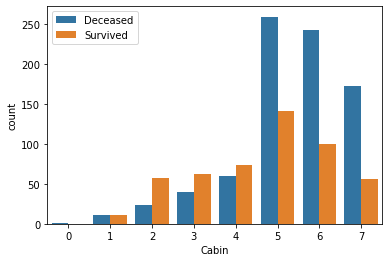

In [35]:
#Plot
Data_cab.Cabin.replace(["A","B","C","D","E","F","G","T"],[1,2,3,4,5,6,7,0],inplace=True)
sn.countplot(data=Data_cab, x="Cabin", hue="Survived")
plt.legend(["Deceased","Survived"],loc="upper left")

.

It seems that the deeper the cabin, the smaller the chance to survive.

However, one thing must be taken into account: the number of passengers in third class (decks E-F-G) is larger than the number of passengers in the first and second class.

Let's normalize each number by the number of people in each deck.

In [36]:
#Normalization
for i in np.sort(Data_cab.Cabin.unique()) :
    print("Percentage of deceased people in deck {}: {:.2f} % (Number of people: {})".format(i, 
                                                                                             100*((Data_cab[Data_cab.Survived==0].Cabin==i).sum())/(Data_cab.Cabin==i).sum(),
                                                                                             (Data_cab.Cabin==i).sum()))

Percentage of deceased people in deck 0: 100.00 % (Number of people: 1)
Percentage of deceased people in deck 1: 50.00 % (Number of people: 22)
Percentage of deceased people in deck 2: 29.63 % (Number of people: 81)
Percentage of deceased people in deck 3: 39.22 % (Number of people: 102)
Percentage of deceased people in deck 4: 45.11 % (Number of people: 133)
Percentage of deceased people in deck 5: 64.75 % (Number of people: 400)
Percentage of deceased people in deck 6: 70.76 % (Number of people: 342)
Percentage of deceased people in deck 7: 75.44 % (Number of people: 228)


.

Despite the largepercentage for decks T and A (only 23 people), for the other decks, the percentage of deceased people increases going deeper into the ship (from deck B to G).